Среднее значение Z по выборке из 1000 пар: 5.2540


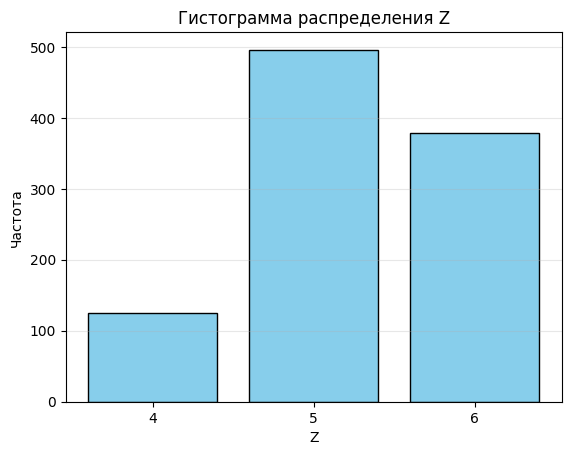

In [8]:
from fractions import Fraction

# Данные задачи
data = [
    # (X, Y, P)
    (3, -2, Fraction(1, 4)),
    (4, -2, Fraction(1, 6)),
    (5, -2, Fraction(1, 8)),
    (3, -1, Fraction(1, 8)),
    (4, -1, Fraction(1, 4)),
    (5, -1, Fraction(1, 12)),
]

# Считаем распределение Z
from collections import defaultdict

Z_probs = defaultdict(Fraction)
for x, y, p in data:
    z = min(6, x - y)
    Z_probs[z] += p

# Формируем Markdown-таблицу
md = "| Z | P(Z) |\n|---|------|\n"
for z in sorted(Z_probs):
    prob = Z_probs[z]
    md += f"| {z} | {prob} |\n"

# Математическое ожидание
E_Z = sum(z * float(p) for z, p in Z_probs.items())

md += f"\n**Математическое ожидание:**\n\n"
md += f"$$\\mathbb{{E}}(Z) = {E_Z}$$"


In [12]:
import numpy as np
from scipy.stats import rv_discrete
from collections import Counter

# Дискретное распределение (X, Y, P)
data = [
    (3, -2, 1/4),
    (4, -2, 1/6),
    (5, -2, 1/8),
    (3, -1, 1/8),
    (4, -1, 1/4),
    (5, -1, 1/12),
]

# Список уникальных X и Y
X_vals = np.array([x for x, y, p in data])
Y_vals = np.array([y for x, y, p in data])
probs = np.array([p for x, y, p in data])

# Для rvs удобно работать с индексами
indices = np.arange(len(data))

# Создаем дискретное распределение по индексам
custom_rv = rv_discrete(name='custom', values=(indices, probs))

# Генерируем 100000 индексов
sample_size = 100_000
sample_indices = custom_rv.rvs(size=sample_size, random_state=42)

# Получаем X и Y по сгенерированным индексам
X_sample = X_vals[sample_indices]
Y_sample = Y_vals[sample_indices]

# Считаем Z для каждой пары
Zs = np.minimum(6, X_sample - Y_sample)

# Частоты появления каждого значения Z
counter = Counter(Zs)
print("Частоты появления каждого значения Z:")
for z in sorted(counter):
    print(f"Z = {z}: {counter[z]} ({counter[z]/sample_size:.3f})")

# Среднее значение Z
mean_Z = np.mean(Zs)
print(f"\nСреднее значение Z по выборке из {sample_size} пар: {mean_Z:.4f}")

Частоты появления каждого значения Z:
Z = 4: 12588 (0.126)
Z = 5: 50109 (0.501)
Z = 6: 37303 (0.373)

Среднее значение Z по выборке из 100000 пар: 5.2472


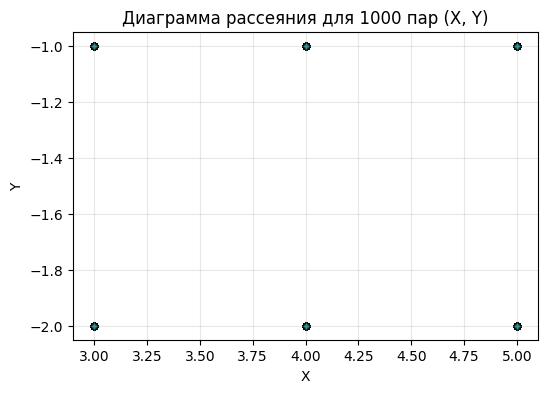

In [9]:
import random
from fractions import Fraction
import matplotlib.pyplot as plt

# Данные задачи
data = [
    (3, -2, Fraction(1, 4)),
    (4, -2, Fraction(1, 6)),
    (5, -2, Fraction(1, 8)),
    (3, -1, Fraction(1, 8)),
    (4, -1, Fraction(1, 4)),
    (5, -1, Fraction(1, 12)),
]

# Преобразуем в список для randoimport random
from fractions import Fraction
import matplotlib.pyplot as plt

# Дискретное распределение (X, Y, P)
data = [
    (3, -2, Fraction(1, 4)),
    (4, -2, Fraction(1, 6)),
    (5, -2, Fraction(1, 8)),
    (3, -1, Fraction(1, 8)),
    (4, -1, Fraction(1, 4)),
    (5, -1, Fraction(1, 12)),
]

# Подготовка для random.choices
values = [(x, y) for x, y, p in data]
weights = [float(p) for x, y, p in data]

# Генерируем выборку из 1000 пар (X, Y) по заданному распределению
sample_size = 1000
sample = random.choices(values, weights=weights, k=sample_size)

# Разделяем X и Y для построения графика
X_sample = [x for x, y in sample]
Y_sample = [y for x, y in sample]

# Строим scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(X_sample, Y_sample, alpha=0.5, s=20, color='teal', edgecolor='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Диаграмма рассеяния для 1000 пар (X, Y)')
plt.grid(True, alpha=0.3)
plt.show()m.choices
values = [(x, y) for x, y, p in data]
weights = [float(p) for x, y, p in data]

# Генерируем 1000 случайных пар (X, Y)
sample_size = 1000
sample = random.choices(values, weights=weights, k=sample_size)

# Разделяем X и Y для построения графика
X_sample = [x for x, y in sample]
Y_sample = [y for x, y in sample]

# Строим scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(X_sample, Y_sample, alpha=0.5, s=20, color='teal', edgecolor='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Диаграмма рассеяния для 1000 пар (X, Y)')
plt.grid(True, alpha=0.3)
plt.show()

|     | 4     | 5     | 6     |
|-----|-------|-------|-------|
| P(Z)| 1/8   | 1/2   | 3/8   |

**Математическое ожидание:**

$$\mathbb{E}(Z) = 5.25$$

In [3]:
import numpy as np

# Все возможные значения на костях
values = [1, 2, 3, 4, 5, 6]

# Список для хранения (X, Y, P)
outcomes = []

for a in values:
    for b in values:
        # X: 0 если сумма нечетная, 1 если четная
        X = 1 if (a + b) % 2 == 0 else 0
        # Y: 0 если произведение нечетное, 1 если четное
        Y = 0 if (a % 2 == 1 and b % 2 == 1) else 1
        outcomes.append((X, Y))

# Подсчитаем вероятности
from collections import Counter
counts = Counter(outcomes)
total = 36

# Вероятности для (X, Y)
P = {}
for key in counts:
    P[key] = counts[key] / total

# Математические ожидания
E_X = sum(x * P.get((x, y), 0) for x in [0, 1] for y in [0, 1])
E_Y = sum(y * P.get((x, y), 0) for x in [0, 1] for y in [0, 1])
E_XY = sum(x * y * P.get((x, y), 0) for x in [0, 1] for y in [0, 1])
E_X2 = sum(x**2 * sum(P.get((x, y), 0) for y in [0, 1]) for x in [0, 1])
E_Y2 = sum(y**2 * sum(P.get((x, y), 0) for x in [0, 1]) for y in [0, 1])

# Дисперсии и ковариация
Var_X = E_X2 - E_X**2
Var_Y = E_Y2 - E_Y**2
Cov_XY = E_XY - E_X * E_Y

# Ковариационная матрица
cov_matrix = np.array([
    [Var_X, Cov_XY],
    [Cov_XY, Var_Y]
])

print("P(X, Y):", P)
print("E[X] =", E_X)
print("E[Y] =", E_Y)
print("Var(X) =", Var_X)
print("Var(Y) =", Var_Y)
print("Cov(X, Y) =", Cov_XY)
print("Covariance matrix:")
print(cov_matrix)

P(X, Y): {(1, 0): 0.25, (0, 1): 0.5, (1, 1): 0.25}
E[X] = 0.5
E[Y] = 0.75
Var(X) = 0.25
Var(Y) = 0.1875
Cov(X, Y) = -0.125
Covariance matrix:
[[ 0.25   -0.125 ]
 [-0.125   0.1875]]


Ковариационная матрица:

\[
\begin{pmatrix}
0.25 & -0.125 \\
-0.125 & 0.1875
\end{pmatrix}
\]

In [4]:
import math

n = 10  # Можно подставить любое n > 0

# Вероятности для одной точки
p_X = 2/5   # вероятность попасть в [0,2]
p_Y = 3/5   # вероятность попасть в [1,4]
p_XY = 1/5  # вероятность попасть в [1,2] (пересечение)

# Математические ожидания
EX = n * p_X
EY = n * p_Y

# Дисперсии
VarX = n * p_X * (1 - p_X)
VarY = n * p_Y * (1 - p_Y)

# Ковариация
CovXY = n * p_XY - n * p_X * p_Y

# Коэффициент корреляции
rho = CovXY / math.sqrt(VarX * VarY)

print(f"Var(X) = {VarX}")
print(f"Var(Y) = {VarY}")
print(f"Cov(X, Y) = {CovXY}")
print(f"rho(X, Y) = {rho}")

Var(X) = 2.4
Var(Y) = 2.4000000000000004
Cov(X, Y) = -0.3999999999999999
rho(X, Y) = -0.1666666666666666


In [14]:
import numpy as np
from scipy.stats import uniform

N_points = 100_000

rv = uniform(loc=0, scale=5)

points = rv.rvs(size=N_points)

in_02 = (points >= 0) & (points <= 2)
in_14 = (points >= 1) & (points <= 4)
in_12 = (points >= 1) & (points <= 2)

p_02 = np.mean(in_02)
p_14 = np.mean(in_14)
p_12 = np.mean(in_12)

print(f"Эмпирическая вероятность попадания в [0,2]: {p_02:.4f}")
print(f"Эмпирическая вероятность попадания в [1,4]: {p_14:.4f}")
print(f"Эмпирическая вероятность попадания в [1,2]: {p_12:.4f}")

Эмпирическая вероятность попадания в [0,2]: 0.4024
Эмпирическая вероятность попадания в [1,4]: 0.6032
Эмпирическая вероятность попадания в [1,2]: 0.2029


In [5]:
import numpy as np

# 1. Вероятности X = k
probs = {k: k/21 for k in range(1, 7)}

# 2. Считаем распределение (Y2, Y3)
joint = {}
for x, p in probs.items():
    y2 = x % 2
    y3 = x % 3
    joint[(y2, y3)] = joint.get((y2, y3), 0) + p

# 3. Вывод распределения (Y2, Y3)
print("Распределение (Y2, Y3):")
for key in sorted(joint):
    print(f"Y2={key[0]}, Y3={key[1]}: P={joint[key]}")

# 4. Считаем мат. ожидания и моменты
E_y2 = sum(y2 * p for (y2, y3), p in joint.items())
E_y3 = sum(y3 * p for (y2, y3), p in joint.items())
E_y2_sq = sum((y2**2) * p for (y2, y3), p in joint.items())
E_y3_sq = sum((y3**2) * p for (y2, y3), p in joint.items())
E_y2y3 = sum(y2 * y3 * p for (y2, y3), p in joint.items())

# 5. Дисперсии и ковариация
Var_y2 = E_y2_sq - E_y2**2
Var_y3 = E_y3_sq - E_y3**2
Cov_y2y3 = E_y2y3 - E_y2 * E_y3

# 6. Корреляция
rho = Cov_y2y3 / np.sqrt(Var_y2 * Var_y3)

print("\nМат. ожидания:")
print(f"E[Y2] = {E_y2}")
print(f"E[Y3] = {E_y3}")

print("\nДисперсии:")
print(f"Var(Y2) = {Var_y2}")
print(f"Var(Y3) = {Var_y3}")

print("\nКовариация:")
print(f"Cov(Y2, Y3) = {Cov_y2y3}")

print("\nКовариационная матрица:")
print(np.array([[Var_y2, Cov_y2y3], [Cov_y2y3, Var_y3]]))

print("\nКорреляция:")
print(f"rho = {rho}")

Распределение (Y2, Y3):
Y2=0, Y3=0: P=0.2857142857142857
Y2=0, Y3=1: P=0.19047619047619047
Y2=0, Y3=2: P=0.09523809523809523
Y2=1, Y3=0: P=0.14285714285714285
Y2=1, Y3=1: P=0.047619047619047616
Y2=1, Y3=2: P=0.23809523809523808

Мат. ожидания:
E[Y2] = 0.42857142857142855
E[Y3] = 0.9047619047619047

Дисперсии:
Var(Y2) = 0.24489795918367346
Var(Y3) = 0.7528344671201815

Ковариация:
Cov(Y2, Y3) = 0.13605442176870747

Ковариационная матрица:
[[0.24489796 0.13605442]
 [0.13605442 0.75283447]]

Корреляция:
rho = 0.3168621252622389


In [7]:
import sympy as sp

# Объявляем переменные
x, y = sp.symbols('x y')

# Плотность
f = 1/30

# Пределы интегрирования для X: x от 0 до 12, y от 0 до (60-5x)/12
Ey_integrand = y * f
Ex_integrand = x * f

# Математическое ожидание X
Ex = sp.integrate(
    sp.integrate(Ex_integrand, (y, 0, (60 - 5*x)/12)),
    (x, 0, 12)
)
Ex = sp.simplify(Ex)

# Математическое ожидание Y
Ey = sp.integrate(
    sp.integrate(Ey_integrand, (x, 0, (60 - 12*y)/5)),
    (y, 0, 5)
)
Ey = sp.simplify(Ey)

print(f"E[X] = {Ex}")
print(f"E[Y] = {Ey}")

E[X] = 4.00000000000000
E[Y] = 1.66666666666667


In [15]:
import numpy as np

N = 100_000  # Размер выборки

# Вершины треугольника: (0,0), (12,0), (0,5)
# Генерируем равномерно по треугольнику с помощью случайных барицентрических координат
u = np.random.uniform(0, 1, N)
v = np.random.uniform(0, 1, N)
mask = (u + v > 1)
u[mask] = 1 - u[mask]
v[mask] = 1 - v[mask]

# Вершины
A = np.array([0, 0])
B = np.array([12, 0])
C = np.array([0, 5])

# Получаем точки
points = (1 - u - v)[:, None] * A + u[:, None] * B + v[:, None] * C
X = points[:, 0]
Y = points[:, 1]

# 1. F_X(4)
Fx4 = np.mean(X <= 4)

# 2. Моменты
EX = np.mean(X)
VarX = np.var(X, ddof=1)
EXY = np.mean(X * Y)

# 3. Ковариация и корреляция
CovXY = np.cov(X, Y, ddof=1)[0, 1]
rhoXY = np.corrcoef(X, Y)[0, 1]

print(f"F_X(4) ≈ {Fx4:.4f}")
print(f"E[X] ≈ {EX:.4f}")
print(f"Var(X) ≈ {VarX:.4f}")
print(f"E[X*Y] ≈ {EXY:.4f}")
print(f"Cov(X, Y) ≈ {CovXY:.4f}")
print(f"rho(X, Y) ≈ {rhoXY:.4f}")

F_X(4) ≈ 0.5550
E[X] ≈ 4.0029
Var(X) ≈ 8.0051
E[X*Y] ≈ 4.9906
Cov(X, Y) ≈ -1.6619
rho(X, Y) ≈ -0.4992


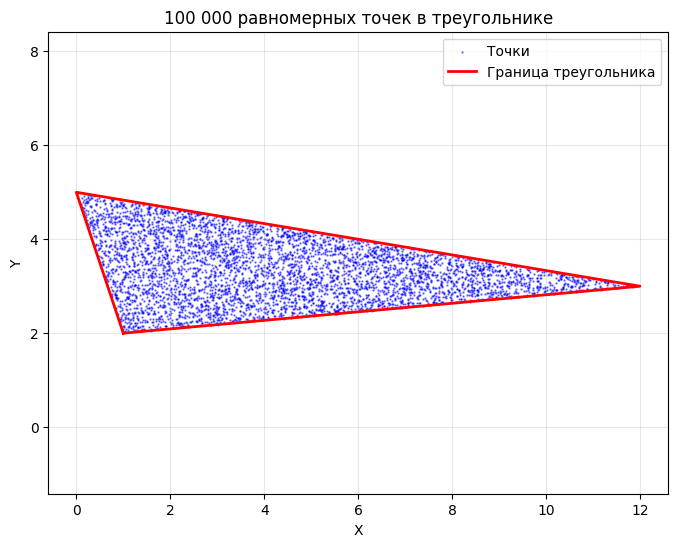

In [29]:
import numpy as np
import matplotlib.pyplot as plt

N = 5000
A = np.array([1, 2])
B = np.array([12, 3])
C = np.array([0, 5])

# Генерируем барицентрические координаты
u = np.random.uniform(0, 1, N)
v = np.random.uniform(0, 1, N)
mask = (u + v > 1)
u[mask] = 1 - u[mask]
v[mask] = 1 - v[mask]

# Получаем точки внутри треугольника
points = (1 - u - v)[:, None] * A + u[:, None] * B + v[:, None] * C
X = points[:, 0]
Y = points[:, 1]

# Рисуем точки и границы треугольника
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, s=0.5, alpha=0.5, color='blue', label='Точки')
plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], 'r-', lw=2, label='Граница треугольника')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('100 000 равномерных точек в треугольнике')
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()